In [1]:
### ROTINA DE TRABALHO: ###

# *Cada arquivo contém somente um dado número de pontos (N = 500; 100; 50; 10);
# *Uma distribuição simulada por arquivo, sendo elas: Bimodal Iguais, Bimodal Maior/Menor e Bimodal Menor/Maior;
# *Cada arquivo com 10 valores de SNR, sendo eles: 100.000, 10.000, 1.000, 100, 10, 1;
# *Serão aplicadas as penalizações 'n' (norma), 'g' (gradiente) e 'c' (curvatura) e também a não-negatividade 'nn0';
# *Segundo a lógica proposta, serão 12 arquivos como este, contendo 72 decaimentos analisados no total;

# mg1 = [[1e-3,0.3,1],[1e-1,0.3,1]]
# mg2 = [[1e-3,0.3,1],[1e-1,0.3,0.5]]
# mg3 = [[1e-3,0.3,0.5],[1e-1,0.3,1]]
# Xi = 1e-4; Xf = 1e0
# Manter a densidade de pontos em 1 pt/ms ou 1000 pts/s

#ARQUIVO 50 PTS

In [16]:
import Laplin as lp
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

In [3]:
def FindOpt(ni,nf,Ns,gi,gf,Gs,ci,cf,Cs,reg):
    #Ajuste Grosso
    Bn = (nf/ni)**(1.0/(Ns-1))
    Bg = (gf/gi)**(1.0/(Gs-1))
    Bc = (cf/ci)**(1.0/(Cs-1))
    Min = 1e10
    for i in range(Ns):
        n=ni*Bn**i
        print "Laço ",n," da varredura em Ns."
        for j in range(Gs):
            g=gi*Bg**j
            for k in range(Cs):
                c=ci*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste grosso: ',PRes
    #Ajuste Fino
    Bn = Bn**(1.0/(Ns-1))
    Bg = Bg**(1.0/(Gs-1))
    Bc = Bc**(1.0/(Cs-1))
    for i in range(Ns):
        n=PRes[1]*Bn**i
        print "Laço ",n," da varredura em N."
        for j in range(Gs):
            g=PRes[2]*Bg**j
            for k in range(Cs):
                c=PRes[3]*Bc**k
                reg.genY([n,g,c],0,'nn0')
                RMS = lp.rmsDiff(sim.Y,reg.Y)
                if RMS < Min:
                    Min = RMS
                    PRes = [RMS,n,g,c]
                    print 'Última otimização do ajuste fino: ',PRes
    return PRes

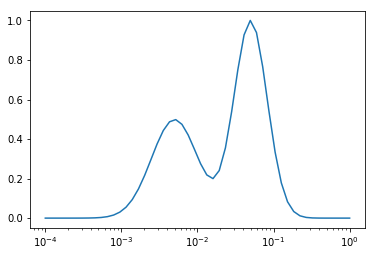

In [17]:
mg = [[5e-3,0.7,0.5],[5e-2,0.5,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,50) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
#plt.xlabel('inverse time [s]')
#plt.ylabel('amplitude')
plt.xscale('log')
#plt.grid(True)
#plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Tabela_mM_50pt.png',dpi=300)

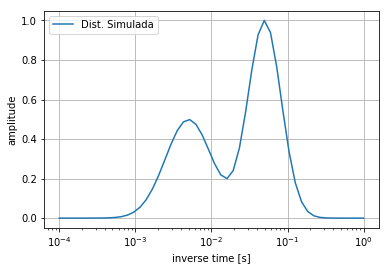

In [4]:
mg = [[5e-3,0.7,0.5],[5e-2,0.5,1]] #[tc, dt, amp]
sim = lp.MultiGauss(mg)
sim.genData(1e-4,1e0,50) #[Xi, Xf, N]
#sim.plotData()

plt.plot(sim.X,sim.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada'],loc=0)
plt.savefig('Sim_Dist_mM_50pt.png',dpi=300)

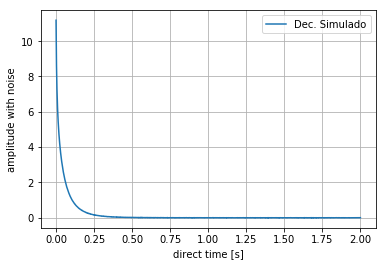

In [5]:
# SNR = 100.000

sig1 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig1.genX(1e-4,2,2000) #xi, xf, N
sig1.genY()
sig1.addGaussNoise(1e5)
#sig1.plotData()

plt.plot(sig1.x,sig1.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e5_mM_50pt.png',dpi=300)

In [6]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,50) #Xi, Xf, N

Opt1 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg1)
print Opt1

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.533065268173506, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.41431139912014686, 1e-08, 1e-08, 8.362510309503733e-08]
Última otimização do ajuste grosso:  [0.18053819640285584, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.08066060933575074, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.025453655336876487, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.010327130926387674, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.010326817148858372, 1e-08, 8.362510309503733e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.010323957827686999, 1e-08, 6.993157867655623e-07, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.010300428912108304, 1e-08, 5.848035476425729e-06, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.010137973952922505, 1e-08, 

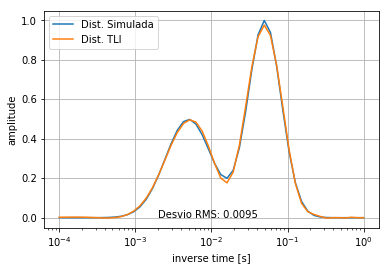

In [6]:
reg1 = lp.InvLaplace(sig1, 0) #0=cpmg/1=invrec
reg1.genX(1e-4,1e0,50) #Xi, Xf, N
reg1.genY([0.0004089623530229578, 1.603111404162099e-08, 0.0004089623530229578], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg1.plotData()
#plt.show()

plt.plot(sim.X,sim.Y)
plt.plot(reg1.X,reg1.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0095')
plt.savefig('Sim_Comp_1e5_mM_50pt.png',dpi=300)

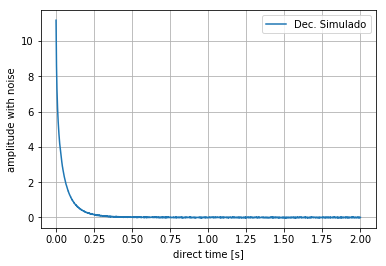

In [7]:
# SNR = 10.000

sig2 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig2.genX(1e-4,2,2000) #xi, xf, N
sig2.genY()
sig2.addGaussNoise(1e4)
#sig2.plotData()

plt.plot(sig2.x,sig2.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e4_mM_50pt.png',dpi=300)

In [9]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,50) #Xi, Xf, N

Opt2 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg2)
print Opt2

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.6228697514967138, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.545166506462345, 1e-08, 1e-08, 6.993157867655623e-07]
Última otimização do ajuste grosso:  [0.2069133970916809, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.12596120661844226, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.07195006203255246, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.03528773205561292, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.017699107811478897, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.01769910293177769, 1e-08, 8.362510309503733e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.01769906257748972, 1e-08, 6.993157867655623e-07, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.017698725788751958, 1e-08, 5.848035476425729e-06, 0.02

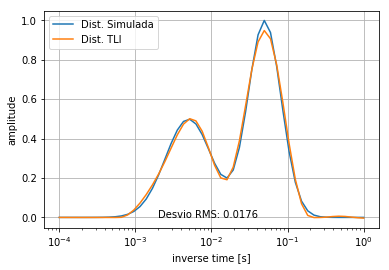

In [8]:
reg2 = lp.InvLaplace(sig2, 0) #0=cpmg/1=invrec
reg2.genX(1e-4,1e0,50) #Xi, Xf, N
reg2.genY([4.8904256961953734e-05, 0.0004089623530229578, 0.03621083296484821], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg2.plotData()
#plt.show()

plt.plot(sim.X,sim.Y)
plt.plot(reg2.X,reg2.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0176')
plt.savefig('Sim_Comp_1e4_mM_50pt.png',dpi=300)

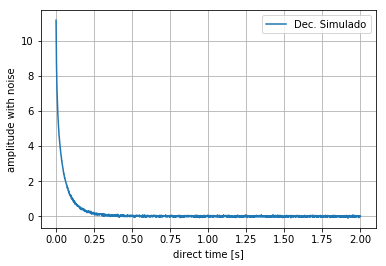

In [9]:
# SNR = 1.000

sig3 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig3.genX(1e-4,2,2000) #xi, xf, N
sig3.genY()
sig3.addGaussNoise(1e3)
#sig3.plotData()

plt.plot(sig3.x,sig3.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e3_mM_50pt.png',dpi=300)

In [12]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,50) #Xi, Xf, N

Opt3 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,2,10,reg3)
print Opt3

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.7433600083428067, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.4395015496824575, 1e-08, 1e-08, 5.848035476425729e-06]
Última otimização do ajuste grosso:  [0.33885987310007154, 1e-08, 1e-08, 4.8904256961953734e-05]
Última otimização do ajuste grosso:  [0.13658079681221613, 1e-08, 1e-08, 0.0004089623530229578]
Última otimização do ajuste grosso:  [0.04653989906139468, 1e-08, 1e-08, 0.00341995189335339]
Última otimização do ajuste grosso:  [0.03122121440436649, 1e-08, 1e-08, 0.028599382966174536]
Última otimização do ajuste grosso:  [0.029805525447706108, 1e-08, 1e-08, 0.23916263490008]
Última otimização do ajuste grosso:  [0.029100205583982786, 1e-08, 0.028599382966174536, 0.028599382966174536]
Laço  8.3625103095e-08  da varredura em Ns.
Laço  6.99315786766e-07  da varredura em Ns.
Laço  5.84803547643e-06  da varredura em Ns.
Laço  4.8904256962e-05  da varredura em Ns.
Laço  0.000408962353023  da va

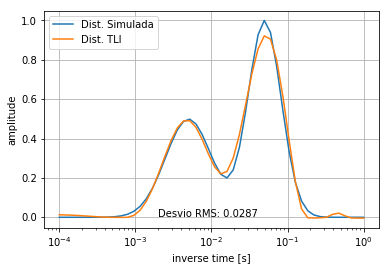

In [10]:
reg3 = lp.InvLaplace(sig3, 0) #0=cpmg/1=invrec
reg3.genX(1e-4,1e0,50) #Xi, Xf, N
reg3.genY([1.2661403572124612e-08, 0.028599382966174536, 0.07349944682476113], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg3.plotData()
#plt.show()

plt.plot(sim.X,sim.Y)
plt.plot(reg3.X,reg3.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0287')
plt.savefig('Sim_Comp_1e3_mM_50pt.png',dpi=300)

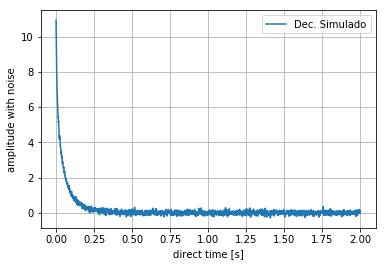

In [11]:
# SNR = 100

sig4 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig4.genX(1e-4,2,2000) #xi, xf, N
sig4.genY()
sig4.addGaussNoise(1e2)
#sig4.plotData()

plt.plot(sig4.x,sig4.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e2_mM_50pt.png',dpi=300)

In [16]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,50) #Xi, Xf, N

Opt4 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,3,10,reg4)
print Opt4

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.7120318578682069, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.6861973542459778, 1e-08, 1e-08, 6.694329500821693e-06]
Última otimização do ajuste grosso:  [0.4384174290713793, 1e-08, 1e-08, 5.856112976155437e-05]
Última otimização do ajuste grosso:  [0.22423992619456737, 1e-08, 1e-08, 0.0005122851987684005]
Última otimização do ajuste grosso:  [0.10553337941058444, 1e-08, 1e-08, 0.004481404746557162]
Última otimização do ajuste grosso:  [0.08016430516317259, 1e-08, 1e-08, 0.03920274985642207]
Última otimização do ajuste grosso:  [0.0427021769319256, 1e-08, 1e-08, 0.34294059189496084]
Última otimização do ajuste grosso:  [0.04270216330954408, 1e-08, 8.362510309503733e-08, 0.34294059189496084]
Última otimização do ajuste grosso:  [0.042702049406354824, 1e-08, 6.993157867655623e-07, 0.34294059189496084]
Última otimização do ajuste grosso:  [0.042701096914025155, 1e-08, 5.848035476425729e-06, 0.3429405

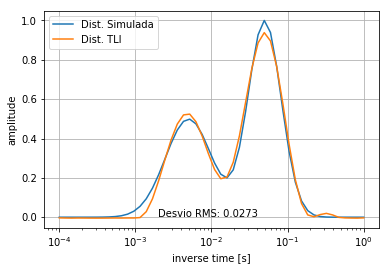

In [12]:
reg4 = lp.InvLaplace(sig4, 0) #0=cpmg/1=invrec
reg4.genX(1e-4,1e0,50) #Xi, Xf, N
reg4.genY([0.03621083296484821, 0.03621083296484821, 0.34294059189496084], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg4.plotData()
#plt.show()

plt.plot(sim.X,sim.Y)
plt.plot(reg4.X,reg4.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0273')
plt.savefig('Sim_Comp_1e2_mM_50pt.png',dpi=300)

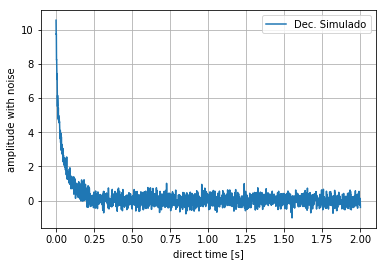

In [13]:
# SNR = 10

sig5 = lp.NMRDecay(sim, 'cpmg') #'cpmg'/'invrec'
sig5.genX(1e-4,2,2000) #xi, xf, N
sig5.genY()
sig5.addGaussNoise(10)
#sig5.plotData()

plt.plot(sig5.x,sig5.yn)
plt.xlabel('direct time [s]')
plt.ylabel('amplitude with noise')
plt.grid(True)
plt.legend(['Dec. Simulado'],loc=0)
plt.savefig('Sim_Decay_1e1_mM_50pt.png',dpi=300)

In [25]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,50) #Xi, Xf, N

Opt5 = FindOpt(1e-8,2,10,1e-8,2,10,1e-8,20,10,reg5)
print Opt5

Laço  1e-08  da varredura em Ns.
Última otimização do ajuste grosso:  [0.7545509285150038, 1e-08, 1e-08, 1e-08]
Última otimização do ajuste grosso:  [0.7284896628488101, 1e-08, 1e-08, 1.1665290395761164e-06]
Última otimização do ajuste grosso:  [0.4200237573316914, 1e-08, 1e-08, 0.0014697344922755982]
Última otimização do ajuste grosso:  [0.2544275499528863, 1e-08, 1e-08, 0.015874010519681986]
Última otimização do ajuste grosso:  [0.11308535268740424, 1e-08, 1e-08, 0.17144879657061446]
Última otimização do ajuste grosso:  [0.060287463368120735, 1e-08, 1e-08, 1.8517494245745794]
Última otimização do ajuste grosso:  [0.060287460095606066, 1e-08, 8.362510309503733e-08, 1.8517494245745794]
Última otimização do ajuste grosso:  [0.060287432729023156, 1e-08, 6.993157867655623e-07, 1.8517494245745794]
Última otimização do ajuste grosso:  [0.06028720387821599, 1e-08, 5.848035476425729e-06, 1.8517494245745794]
Última otimização do ajuste grosso:  [0.060285290266016166, 1e-08, 4.8904256961953734e

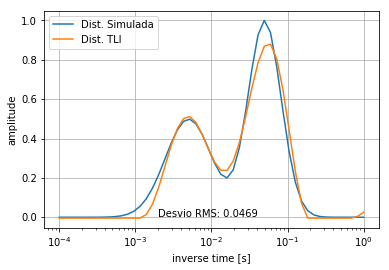

In [14]:
reg5 = lp.InvLaplace(sig5, 0) #0=cpmg/1=invrec
reg5.genX(1e-4,1e0,50) #Xi, Xf, N
reg5.genY([0.028599382966174536, 0.23916263490008, 4.093217392304882], 0, 'nn0') #[N,G,C], 0=noTSVD/1=TSVD, '0'/'nn0'/'nnx'/'x'
#sim.plotData()
#reg5.plotData()
#plt.show()

plt.plot(sim.X,sim.Y)
plt.plot(reg5.X,reg5.Y)
plt.xlabel('inverse time [s]')
plt.ylabel('amplitude')
plt.xscale('log')
plt.grid(True)
plt.legend(['Dist. Simulada','Dist. TLI'],loc=0)
plt.text(0.002,0,'Desvio RMS: 0.0469')
plt.savefig('Sim_Comp_1e1_mM_50pt.png',dpi=300)